In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
#Finding missing values and duplicate rows in the data sets and removing the incorrect data

# Loading datasets
products_df = pd.read_csv("PRODUCTS_TAKEHOME.csv")
transactions_df = pd.read_csv("TRANSACTION_TAKEHOME.csv")
users_df = pd.read_csv("USER_TAKEHOME.csv")


# Function to check data quality issues
def data_quality(df, name):
    print(f"\n=== Data Report for {name} ===")
    
    # Checking for missing values
    missing_values = df.isnull().sum()
    print("\nNo. of Missing Values for each column in the dataset:\n", missing_values[missing_values > 0])
    
    missing_percent = df.isnull().mean() * 100
    missing_percent = missing_percent[missing_percent > 0]  # Filter only columns with missing values
    
    print(f"\n=== Missing Values Percentage in {name} ===")
    print(missing_percent.sort_values(ascending=False))
    
    # Checking for duplicates
    duplicate_rows_count = df.duplicated().sum()
    print("\nDuplicate Rows:", duplicate_rows_count)

    
    # 2. Bar plot of missing values percentage
    missing_percent = df.isnull().mean() * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)  # Only missing values
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percent.index, y=missing_percent, palette="magma")
    plt.xticks(rotation=45)
    plt.ylabel("Percentage Missing")
    plt.title("Percentage of Missing Values - Products Dataset")
    plt.show()



=== Data Report for Products Dataset ===

No. of Missing Values for each column in the dataset:
 CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64

=== Missing Values Percentage in Products Dataset ===
CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
CATEGORY_3       7.162895
BARCODE          0.476020
CATEGORY_2       0.168411
CATEGORY_1       0.013128
dtype: float64

Duplicate Rows: 215


/var/folders/4l/zh8767s15hv5stddxkmvg0p40000gn/T/ipykernel_79858/3781201538.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent, palette="magma")


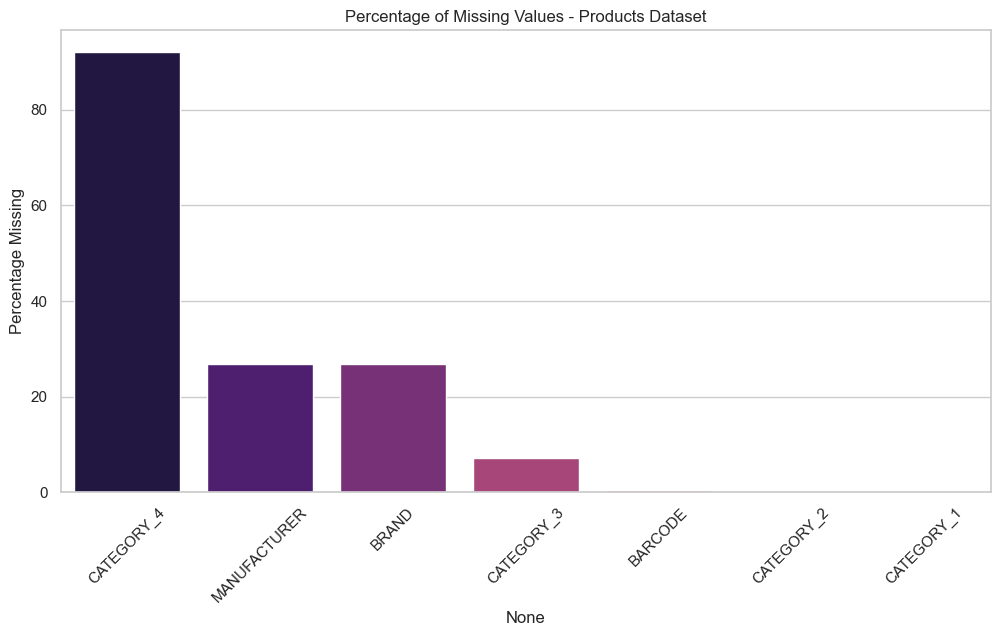

In [92]:
#Getting data quality report for Products Datset
data_quality(products_df, "Products Dataset")


1. There are 215 duplicate rows in Products data set. It is better to remove them from dataset before doing any analysis.
2. 92% of Category_4 values are missing in the dataset. It shows that it is recommended not to do any analysis using Category_4 column as most of it's values are missing.


=== Data Report for Users Dataset ===

No. of Missing Values for each column in the dataset:
 BIRTH_DATE     3675
STATE          4812
LANGUAGE      30508
GENDER         5892
dtype: int64

=== Missing Values Percentage in Users Dataset ===
LANGUAGE      30.508
GENDER         5.892
STATE          4.812
BIRTH_DATE     3.675
dtype: float64

Duplicate Rows: 0


/var/folders/4l/zh8767s15hv5stddxkmvg0p40000gn/T/ipykernel_79858/3781201538.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent, palette="magma")


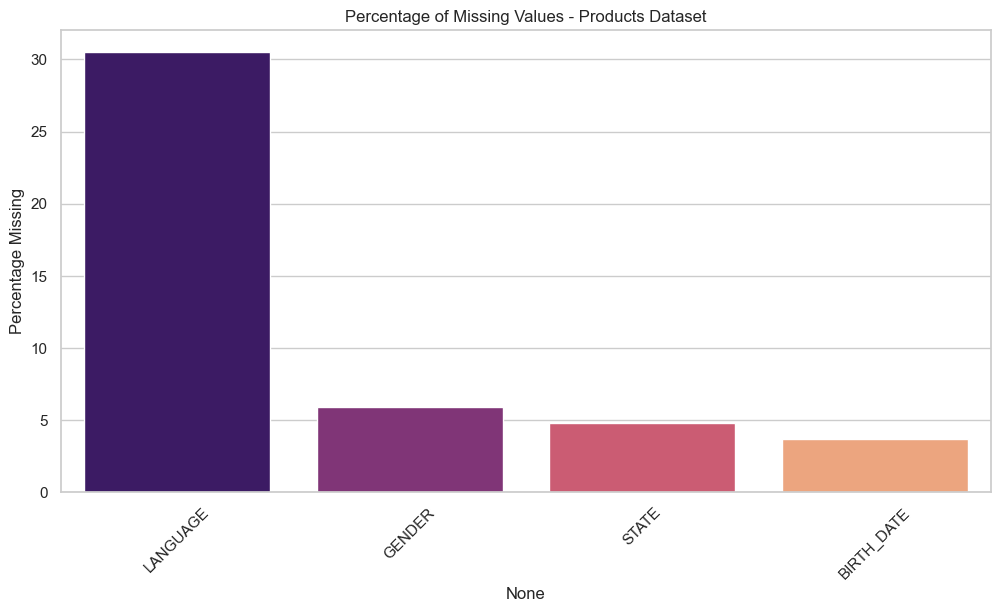

In [94]:
data_quality(users_df, "Users Dataset")

1. Lanuage column has around 30% of missing values making it difficult to use the column for analysis.
2. Other columns like Gender, State and BirthDate also has missing values but just around 5%.


=== Data Report for Transactions Dataset ===

No. of Missing Values for each column in the dataset:
 BARCODE        5762
FINAL_SALE    12500
dtype: int64

=== Missing Values Percentage in Transactions Dataset ===
FINAL_SALE    25.000
BARCODE       11.524
dtype: float64

Duplicate Rows: 171


/var/folders/4l/zh8767s15hv5stddxkmvg0p40000gn/T/ipykernel_79858/475684170.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions_df = transactions_df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)
/var/folders/4l/zh8767s15hv5stddxkmvg0p40000gn/T/ipykernel_79858/3781201538.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent, palette="magma")


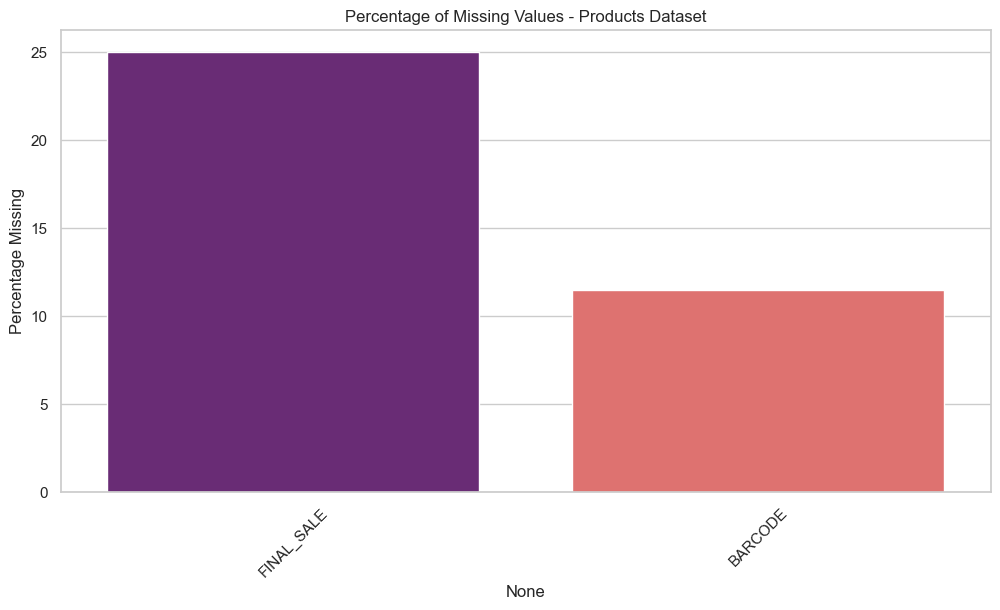

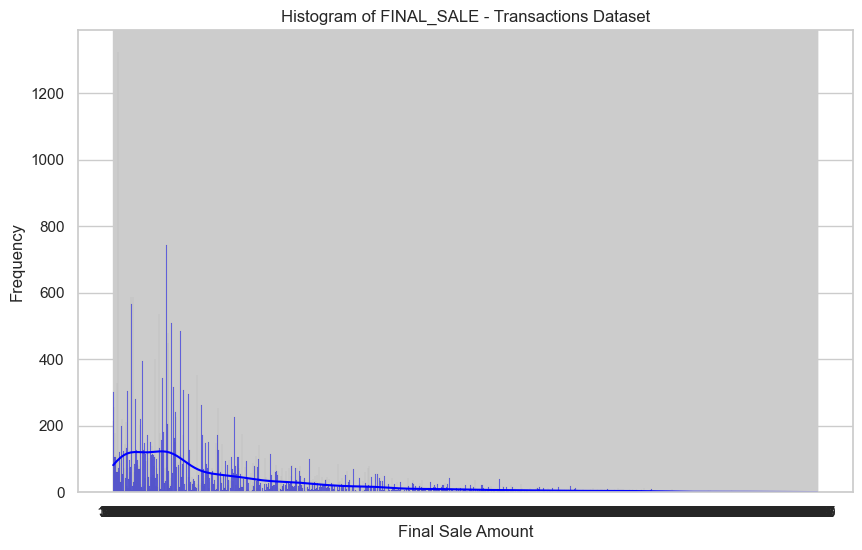

In [96]:
# Replace only spaces (including multiple spaces) with NaN
transactions_df = transactions_df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

#Converting text zero with 0
transactions_df["FINAL_QUANTITY"] = transactions_df["FINAL_QUANTITY"].replace('zero', 0.0)

data_quality(transactions_df, "Transactions Dataset")

# Creating histogram for FINAL_SALE column
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df["FINAL_SALE"], bins=30, kde=True, color="blue", edgecolor="black")

# Labels and title
plt.xlabel("Final Sale Amount")
plt.ylabel("Frequency")
plt.title("Histogram of FINAL_SALE - Transactions Dataset")
plt.show()

1. Transaction Datset 25% missing data making it difficult to use for data analysis.
2. It has 171 duplicate rows which should be removed as it might effect data anlysis.
3. The histogram demonstrates that the majority of the final sale amounts are grouped around lower values, with a lengthy tail stretching to higher sums. This indicates a positively skewed distribution, with a few high-value sales and the majority of smaller transactions.

In [98]:
#Removing duplicate rows from datasets and saving them
products_df=products_df.drop_duplicates()
transactions_df=transactions_df.drop_duplicates()
users_df=users_df.drop_duplicates()

products_df.to_csv('PRODUCTS_TAKEHOME_CLEANED.csv', sep='\t', index=False)
transactions_df.to_csv('TRANSACTION_TAKEHOME_CLEANED.csv', sep='\t', index=False)
users_df.to_csv('USER_TAKEHOME_CLEANED.csv', sep='\t', index=False)